1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
[]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
[]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
[]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
[]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
[]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
[]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
[]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
[]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[]
1/1 ━━━━━━━━━━━━━━━━━━━━

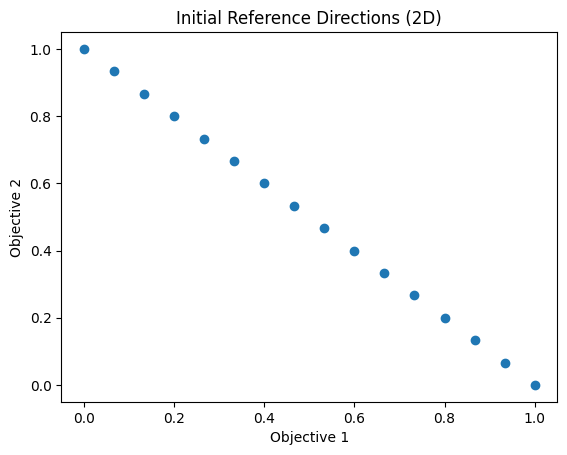

[{'D': 5, 'M': 2, 'problem_name': 'dtlz3', 'IGD_Hybrid': 6.098965375533107, 'IGD_Baseline': 1.0403342376243139}]
D: 5, M: 2, IGD_H:6.098965375533107, IGD_B:1.0403342376243139, problem:dtlz3
completed running D:5, M:2, Problem:dtlz3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
[{'D': 5, 'M': 2, 'problem_name': 'dtlz3', 'IGD_Hybrid': 6.098965375533107, 'IGD_Baseline': 1.0403342376243139}]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[{'D': 5, 'M': 2, 'problem_name': 'dtlz3', 'IGD_Hybrid': 6.098965375533107, 'IGD_Baseline': 1.0403342376243139}]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[{'D': 5, 'M': 2, 'problem_name': 'dtlz3', 'IGD_Hybrid': 6.098965375533107, 'IGD_Baseline': 1.0403342376243139}]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[{'D': 5, 'M': 2, 'problem_name': 'dtlz3', 'IGD_Hybrid': 6.098965375533107, 'IGD_Baseline': 1.0403342376243139}]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[{'D': 5, 'M': 2, 'problem_name': 'dtlz3', 'IGD_Hybrid': 6.098965375533107, 'IGD_Baseline': 1.0403342376243139}]
1/1 ━━━━━━━━━

KeyboardInterrupt: 

In [10]:
# %matplotlib inline
from pymoo.algorithms.moo.moead import MOEAD
from pymoo.optimize import minimize
from pymoo.problems import get_problem
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.visualization.scatter import Scatter
from pymoo.indicators.hv import HV
from pymoo.indicators.igd import IGD
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np


# List of combinations for D (decision variables) and M (objectives)
D_values = [5]#5,10,100
M_values = [2]
problems = ["dtlz3","dtlz4","dtlz6","dtlz7"]
gen = 150#150
partitions =15#15
n_neighbours = 15
epochs = 40#40
train_interval = 5#5
# D_values = [5]
# M_values = [3]

baseline_hv = []
hybridised_hv = []

results_data = []



def create_weight_adjustment_nn(input_dim, output_dim):
    
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(input_dim,)),
        
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.2),  # Dropout layer with 20% rate
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.2),  # Dropout layer with 20% rate
        tf.keras.layers.Dense(output_dim, activation='linear'),
    ])
    model.compile(optimizer='adam', loss='mse')
    return model


def adjust_weights(model, weight_vectors):
    weights_tensor = tf.convert_to_tensor(weight_vectors, dtype=tf.float32)
    adjusted_weights = model.predict(weights_tensor)
    adjusted_weights /= np.sum(adjusted_weights, axis=1, keepdims=True)

    #adjusted_weights = adjusted_weights / np.linalg.norm(adjusted_weights, axis=1, keepdims=True)
    adjusted_weights = adjusted_weights.astype(np.float64)  # Convert to float64 for MOEA/D compatibility

    return adjusted_weights

def init_nn(M):
    model = create_weight_adjustment_nn(input_dim=M, output_dim=M)
    return model

class DynamicWeightAdjustment:
    def __init__(self, model, ref_dirs, epochs,train_interval):
        self.model = model
        self.ref_dirs = ref_dirs
        self.epochs = epochs
        self.train_interval = train_interval
        self.gen_counter = 0

        # fig = plt.figure()
        # ax = fig.add_subplot(111, projection='3d')
        # ax.scatter(algorithm.ref_dirs[:, 0], algorithm.ref_dirs[:, 1])
        # ax.set_xlabel('Objective 1')
        # ax.set_ylabel('Objective 2')
        # ax.set_title('Initial Reference Directions (3D)')
        # plt.show()
        

    def __call__(self, algorithm):
        self.gen_counter += 1

        adjusted_weights = adjust_weights(self.model, self.ref_dirs)
        #self.ref_dirs = adjusted_weights

        # print("Adjusted weights range: ", np.min(adjusted_weights), np.max(adjusted_weights))
        print(results_data)

        algorithm.ref_dirs = adjusted_weights

        if self.gen_counter % self.train_interval == 0:

            self.model.fit(algorithm.ref_dirs, adjusted_weights, epochs=self.epochs, verbose=0)
            # fig = plt.figure()
            # ax = fig.add_subplot(111)  # No need for projection='2d' as it's a standard 2D plot
            # ax.scatter(algorithm.ref_dirs[:, 0], algorithm.ref_dirs[:, 1])
            # ax.set_xlabel('Objective 1')
            # ax.set_ylabel('Objective 2')
            # ax.set_title('Initial Reference Directions (2D)')
            # plt.show()

# Loop over all combinations of D and M
for D in D_values:
    for M in M_values:
        if M > D:
            print(f"Skipping combination of D: {D} and M: {M}.")
            continue
        # Create the problem instance for each combination (DTLZ3, DTLZ4, DTLZ6, DTLZ7)
        for problem_name in problems:
            problem = get_problem(problem_name, n_var=D, n_obj=M)

            model = init_nn(M)

            #hybridised
            ref_dirs = get_reference_directions("das-dennis", M, n_partitions=partitions)
            algorithm = MOEAD(ref_dirs, n_neighbors=n_neighbours, prob_neighbor_mating=0.7)
            callback = DynamicWeightAdjustment(model,ref_dirs,epochs=epochs,train_interval=train_interval)
            res = minimize(problem, algorithm, ('n_gen', gen), seed=1, verbose=False, callback=callback)

            #baseline
            ref_dirs_baseline = get_reference_directions("das-dennis", M, n_partitions=partitions)
            algorithm_baseline = MOEAD(ref_dirs_baseline, n_neighbors=n_neighbours, prob_neighbor_mating=0.7)
            res_baseline = minimize(problem, algorithm_baseline, ('n_gen', gen), seed=1, verbose=False)
        
            fig = plt.figure()
            ax = fig.add_subplot(111)  # No need for projection='2d' as it's a standard 2D plot
            ax.scatter(algorithm_baseline.ref_dirs[:, 0], algorithm_baseline.ref_dirs[:, 1])
            ax.set_xlabel('Objective 1')
            ax.set_ylabel('Objective 2')
            ax.set_title('Initial Reference Directions (2D)')
            plt.show()
            # scatter = Scatter(legend=True)
            # scatter.title = (f"Pareto Front Comparison between Baseline and Hybridised Algorithms on Problem {problem_name}")
            # scatter.add(res.F, label="Hybridised")
            # scatter.add(res_baseline.F, label="Baseline")
            # scatter.show()
            # plt.show()

            # Determine whether to pass `ref_dirs` based on the problem type
            try:
                if problem_name in ["dtlz6", "dtlz7"] or M <= 3:
                    pareto_front = problem.pareto_front()  # For `DTLZ6`, `DTLZ7`, or when M <= 3
                    igd_metric = IGD(pareto_front)
                    igd_value_hybrid = igd_metric.do(res.F)
                    igd_value_baseline = igd_metric.do(res_baseline.F)
                else:
                    pareto_front = problem.pareto_front(ref_dirs=ref_dirs)  # For compatible problems
                    igd_metric = IGD(pareto_front)
                    igd_value_hybrid = igd_metric.do(res.F)
                    igd_value_baseline = igd_metric.do(res_baseline.F)
            except Exception as e:
                print(f"Error calculating Pareto front for {problem_name}: {e}")
                igd_value_hybrid = "No Pareto front"
                igd_value_baseline = "No Pareto Front"
                continue
                # Get the Pareto front using the specified directions
            
            #pareto_front = problem.pareto_front(ref_dirs=pareto_reference_directions)
            
            #reference_point = np.array([1] * M)
            # reference_point = np.max(np.vstack((res.F, res_baseline.F)), axis=0) + 0.1
            # hv = HV(reference_point)
            # hv_hybrid = hv(res.F)
            # hv_baseline = hv(res_baseline.F)

            results_data.append({
                "D": D,
                "M": M,
                "problem_name": problem_name,
                "IGD_Hybrid": igd_value_hybrid,
                "IGD_Baseline": igd_value_baseline
            })

            print(results_data)

            print(f"D: {D}, M: {M}, IGD_H:{igd_value_hybrid}, IGD_B:{igd_value_baseline}, problem:{problem_name}")
            #Scatter().add(res.F).show()
            print(f"completed running D:{D}, M:{M}, Problem:{problem_name}")


In [ ]:
print(results_data)


[{'D': 100, 'M': 3, 'problem_name': 'dtlz3', 'IGD_Hybrid': 1139.587256203801, 'IGD_Baseline': 1263.4879258534618}, {'D': 100, 'M': 3, 'problem_name': 'dtlz4', 'IGD_Hybrid': 0.949552278403547, 'IGD_Baseline': 0.9495906469988393}, {'D': 100, 'M': 3, 'problem_name': 'dtlz6', 'IGD_Hybrid': 76.71612407420758, 'IGD_Baseline': 73.5282209600359}, {'D': 100, 'M': 3, 'problem_name': 'dtlz7', 'IGD_Hybrid': 0.7658404251891204, 'IGD_Baseline': 0.6459580213417606}]
